# RNA applied to VLC Sensor

##Gdrive Link
---

In [2]:
from google.colab import drive
drive.mount('/content//drive')
path = 'drive/MyDrive/Colab_Notebooks/RNA_Sensor_Luz/'


Mounted at /content//drive


In [3]:
!ls -l drive/MyDrive/Colab_Notebooks/RNA_Sensor_Luz/

total 7503
-rw------- 1 root root   44000 Nov  3 11:05 AguaPred.csv
-rw------- 1 root root   44000 Nov  3 11:05 AguaReal.csv
-rw------- 1 root root    3750 Nov  3 11:03 convergencia.csv
-rw------- 1 root root     682 Nov  3 19:33 convergencia.eps
-rw------- 1 root root    3750 Nov  3 11:04 convergenciaLoss.csv
-rw------- 1 root root    1273 Nov  3 19:26 convergencia.png
-rw------- 1 root root    3750 Nov  3 11:04 convergenciaValLoss.csv
-rw------- 1 root root  340800 Nov 22  2021 dadosAW460tr.csv
-rw------- 1 root root   84731 Nov 22  2021 dadosAW460ts.csv
-rw------- 1 root root  344029 Aug 20  2021 dadosAW68tr.csv
-rw------- 1 root root  300362 Jun  6 23:59 dadosAW68trr.csv
-rw------- 1 root root   86046 Aug 20  2021 dadosAW68ts.csv
-rw------- 1 root root   75117 Jun  6 23:01 dadosAW68tss.csv
-rw------- 1 root root   33000 Jun  7 19:13 EmulcaoPred.csv
-rw------- 1 root root   33000 Jun  7 19:13 EmulcaoReal.csv
-rw------- 1 root root    5000 Nov  3 19:18 loss.csv
-rw------- 1 root root

## Dataset Processing
---

### Loading dataset

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#loading the dataset
#ataset1 = np.genfromtxt(path+"dadosAW460tr.csv", delimiter=',')
#dataset1 = dataset1.astype(float)
dataset1 = pd.read_csv(path+"dadosAW460tr.csv", delimiter=',') 

#dataset2 = np.genfromtxt(path+"dadosAW460ts.csv", delimiter=',')
#dataset2 = dataset2.astype(float)
dataset2 = pd.read_csv(path+"dadosAW460ts.csv", delimiter=',') 

#dataset3 = np.genfromtxt(path+"dadosAW68trr.csv", delimiter=',')
#dataset3 = dataset3.astype(float)
dataset3 = pd.read_csv(path+"dadosAW68trr.csv", delimiter=',') 

#dataset4 = np.genfromtxt(path+"dadosAW68tss.csv", delimiter=',')
#dataset4 = dataset4.astype(float)
dataset4 = pd.read_csv(path+"dadosAW68tss.csv", delimiter=',') 


dataset1 = dataset1.values
dataset2 = dataset2.values
dataset3 = dataset3.values
dataset4 = dataset4.values

dataset1 =np.array(dataset1)
dataset2 =np.array(dataset2)
dataset3 =np.array(dataset3)
dataset4 =np.array(dataset4)

print(dataset1.shape)
print(dataset1)
#print(dataset2)

#Inserir  coluna de (zeros) interface no AW68
a = np.zeros([len(dataset3),1])
b = np.zeros([len(dataset4),1])
aux1=np.concatenate((dataset3[:,1:2], dataset3[:,0:1]), axis=1)
aux2=np.concatenate((dataset4[:,1:2], dataset4[:,0:1]), axis=1)
dataset3=np.concatenate((aux1, a[:],dataset3[:,2:]), axis=1)
dataset4=np.concatenate((aux2, b[:],dataset4[:,2:]), axis=1)
print(dataset3.shape)
print(dataset3)
#print(dataset4.shape)
#print(dataset4)

#classifica tipo de oleo
c = np.zeros([len(dataset1),1])
d = np.ones([len(dataset3),1])
classe=np.concatenate((c[:],d[:]), axis=0)

#unir dataset
datasetTotal=np.concatenate((dataset1, dataset3), axis=0)

print(datasetTotal.shape)
print(datasetTotal)
print(classe)

(8799, 7)
[[ 2.     24.      0.269  ...  2.4681  2.4421  2.4781]
 [ 2.     24.      0.269  ...  2.4681  2.4421  2.4781]
 [ 2.     24.      0.269  ...  2.4681  2.4421  2.4781]
 ...
 [22.      4.      4.     ...  2.6843  2.6581  2.6961]
 [22.      4.      4.     ...  2.6843  2.6581  2.6961]
 [22.      4.      4.     ...  2.6843  2.6581  2.6961]]
(8799, 7)
[[ 2.     24.      0.     ...  2.3977  2.3721  2.4101]
 [ 2.     24.      0.     ...  2.4025  2.3821  2.4161]
 [ 2.     24.      0.     ...  2.404   2.3721  2.4201]
 ...
 [22.      4.      0.     ...  2.674   2.6381  2.6821]
 [22.      4.      0.     ...  2.6739  2.6641  2.6841]
 [22.      4.      0.     ...  2.6718  2.6501  2.6861]]
(17598, 7)
[[ 2.     24.      0.269  ...  2.4681  2.4421  2.4781]
 [ 2.     24.      0.269  ...  2.4681  2.4421  2.4781]
 [ 2.     24.      0.269  ...  2.4681  2.4421  2.4781]
 ...
 [22.      4.      0.     ...  2.674   2.6381  2.6821]
 [22.      4.      0.     ...  2.6739  2.6641  2.6841]
 [22.      4.    

In [6]:
# conversao de volume para nivel
#auxx=[2,4,6,8,10,12,14, 16,18,20,22,24]
#auxx= np.array(auxx)
#auxx =((auxx*0.001)/0.1254)*100

#print(datasetTotal)
#print(len(dataset1))

for i in range(len(dataset1)):
    dataset1[i,0]=((dataset1[i,0]*0.001)/0.1254)*100
    dataset1[i,1]=((dataset1[i,1]*0.001)/0.1254)*100
    dataset1[i,2]=((dataset1[i,2]*0.001)/0.1254)*100

for i in range(len(dataset2)):
    dataset2[i,0]=((dataset2[i,0]*0.001)/0.1254)*100
    dataset2[i,1]=((dataset2[i,1]*0.001)/0.1254)*100
    dataset2[i,2]=((dataset2[i,2]*0.001)/0.1254)*100

for i in range(len(dataset3)):
    dataset3[i,0]=((dataset3[i,0]*0.001)/0.1254)*100
    dataset3[i,1]=((dataset3[i,1]*0.001)/0.1254)*100
    dataset3[i,2]=((dataset3[i,2]*0.001)/0.1254)*100

for i in range(len(dataset4)):
    dataset4[i,0]=((dataset4[i,0]*0.001)/0.1254)*100
    dataset4[i,1]=((dataset4[i,1]*0.001)/0.1254)*100
    dataset4[i,2]=((dataset4[i,2]*0.001)/0.1254)*100

for i in range(len(datasetTotal)):
    datasetTotal[i,0]=((datasetTotal[i,0]*0.001)/0.1254)*100
    datasetTotal[i,1]=((datasetTotal[i,1]*0.001)/0.1254)*100
    datasetTotal[i,2]=((datasetTotal[i,2]*0.001)/0.1254)*100

#Adicionar classe  no datasetTotal
datasetTotal=np.concatenate((datasetTotal, classe), axis=1)

print(dataset1.shape)
print(dataset1)
print(dataset3.shape)
print(dataset3)
print(datasetTotal.shape)
print(datasetTotal)

(8799, 7)
[[ 1.59489633 19.13875598  0.21451356 ...  2.4681      2.4421
   2.4781    ]
 [ 1.59489633 19.13875598  0.21451356 ...  2.4681      2.4421
   2.4781    ]
 [ 1.59489633 19.13875598  0.21451356 ...  2.4681      2.4421
   2.4781    ]
 ...
 [17.54385965  3.18979266  3.18979266 ...  2.6843      2.6581
   2.6961    ]
 [17.54385965  3.18979266  3.18979266 ...  2.6843      2.6581
   2.6961    ]
 [17.54385965  3.18979266  3.18979266 ...  2.6843      2.6581
   2.6961    ]]
(8799, 7)
[[ 1.59489633 19.13875598  0.         ...  2.3977      2.3721
   2.4101    ]
 [ 1.59489633 19.13875598  0.         ...  2.4025      2.3821
   2.4161    ]
 [ 1.59489633 19.13875598  0.         ...  2.404       2.3721
   2.4201    ]
 ...
 [17.54385965  3.18979266  0.         ...  2.674       2.6381
   2.6821    ]
 [17.54385965  3.18979266  0.         ...  2.6739      2.6641
   2.6841    ]
 [17.54385965  3.18979266  0.         ...  2.6718      2.6501
   2.6861    ]]
(17598, 8)
[[ 1.59489633 19.13875598  0.2145

### Rescaling


In [7]:
from sklearn.preprocessing import MinMaxScaler

print(dataset1)


# rescaling
scaler1 = MinMaxScaler(feature_range=(-1, 1))
scaled_dataset1 = scaler1.fit_transform(dataset1)
#scaled_dataset2 = scaler1.fit_transform(dataset2)
print(scaler1.data_max_)
print(scaler1.data_min_)

print(scaled_dataset1.shape)
print(scaled_dataset1[0:4,0:7])

scaler2 = MinMaxScaler(feature_range=(-1, 1))
scaled_dataset3 = scaler2.fit_transform(dataset3)
#scaled_dataset4 = scaler2.fit_transform(dataset4)

print(scaled_dataset3.shape)
print(scaled_dataset3[0:4,0:7])

scaler3 = MinMaxScaler(feature_range=(-1, 1))
scaled_datasetTotal = scaler3.fit_transform(datasetTotal)

print(scaled_datasetTotal.shape)
print(scaled_datasetTotal[0:4,0:7])

#separando entradas e saidas
#AW460
inputs1 = scaled_dataset1[:,3:7]
outputs1 = scaled_dataset1[:,0:3]
#inputs2 = scaled_dataset2[:,3:7]
#outputs2 = scaled_dataset2[:,0:3]

#AW68
inputs3 = scaled_dataset3[:,3:7]
outputs3 = scaled_dataset3[:,0:3]
#inputs4 = scaled_dataset4[:,3:7]
#outputs4 = scaled_dataset4[:,0:3]

inputsTotal = scaled_datasetTotal[:,3:7]
outputsTotal = scaled_datasetTotal[:,0:3]
outputsClasseTotal = scaled_datasetTotal[:,7:]

#inputst = np.concatenate([inputs1,inputs2])
#outputst = np.concatenate([outputs1,outputs2])

inputst = inputsTotal
outputst =outputsTotal


print(inputst.shape)
print(outputst.shape)
print(inputst)
print(outputst)


[[ 1.59489633 19.13875598  0.21451356 ...  2.4681      2.4421
   2.4781    ]
 [ 1.59489633 19.13875598  0.21451356 ...  2.4681      2.4421
   2.4781    ]
 [ 1.59489633 19.13875598  0.21451356 ...  2.4681      2.4421
   2.4781    ]
 ...
 [17.54385965  3.18979266  3.18979266 ...  2.6843      2.6581
   2.6961    ]
 [17.54385965  3.18979266  3.18979266 ...  2.6843      2.6581
   2.6961    ]
 [17.54385965  3.18979266  3.18979266 ...  2.6843      2.6581
   2.6961    ]]
[17.54385965 19.13875598  3.18979266  2.6843      2.6843      2.6581
  2.6961    ]
[1.59489633 3.18979266 0.21451356 2.4681     2.4681     2.4421
 2.4781    ]
(8799, 7)
[[-1.  1. -1. -1. -1. -1. -1.]
 [-1.  1. -1. -1. -1. -1. -1.]
 [-1.  1. -1. -1. -1. -1. -1.]
 [-1.  1. -1. -1. -1. -1. -1.]]
(8799, 7)
[[-1.          1.         -1.         -0.86365045 -0.86365045 -0.6142132
  -0.91082803]
 [-1.          1.         -1.         -0.83390146 -0.83390146 -0.56345178
  -0.87261146]
 [-1.          1.         -1.         -0.8246049  -

In [8]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
outputsClasseTotal = pd.DataFrame(encoder.fit_transform(outputsClasseTotal).toarray())
print(outputsClasseTotal )

         0    1
0      1.0  0.0
1      1.0  0.0
2      1.0  0.0
3      1.0  0.0
4      1.0  0.0
...    ...  ...
17593  0.0  1.0
17594  0.0  1.0
17595  0.0  1.0
17596  0.0  1.0
17597  0.0  1.0

[17598 rows x 2 columns]


In [9]:
print(inputs1.shape[0])
#print(inputs2.shape[0])
print(inputst.shape[0])

8799
17598


#Dividing the dataset into training, validation, and test KNN, RandomForest

In [10]:
from sklearn.model_selection import train_test_split

training_inputs,test_inputs,training_outputs,test_outputs = train_test_split(inputst,outputst, test_size=0.2,  shuffle=True, random_state=42)
training_inputs,val_inputs,training_outputs,val_outputs = train_test_split(inputst,outputst, test_size=0.2,  shuffle=True, random_state=42)

#training_inputs,test_inputs,training_outputs,test_outputs,training_outputsClasseTotal,test_outputsClasseTotal = train_test_split(inputsTotal,outputsTotal,outputsClasseTotal, test_size=0.2,  shuffle=True, random_state=42)
#training_inputs,val_inputs,training_outputs,val_outputs,training_outputsClasseTotal,val_outputsClasseTotal    = train_test_split(inputsTotal,outputsTotal,outputsClasseTotal, test_size=0.2,  shuffle=True, random_state=42)


print(training_inputs.shape)
print(val_inputs.shape)
print(test_inputs.shape)


(14078, 4)
(3520, 4)
(3520, 4)


# KNN - k-nearest neighbors for multioutput regression

0.0005946081367352159
0.0010206452769886362
RMSE = 0.030972
MSE  = 0.001021
R2   = 0.989751


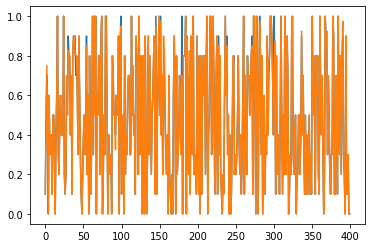

In [ ]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
# define model
model = KNeighborsRegressor(n_neighbors=4, weights='uniform', algorithm='kd_tree', leaf_size=50, p=2, metric='euclidean', metric_params=None, n_jobs=None)
# fit model
#training_inputs2=np.concatenate((training_inputs, val_inputs), axis=0)
#training_outputs2=np.concatenate((training_outputs, val_outputs), axis=0)
training_inputs2=training_inputs
training_outputs2=training_outputs
model.fit(training_inputs2, training_outputs2)
# make a prediction
ytrainpredict = model.predict(training_inputs2)
mse = mean_squared_error(training_outputs2, ytrainpredict)
print(mse)

# make a prediction
ypredict = model.predict(test_inputs)
# summarize prediction
#print(yhat[0])
mse = mean_squared_error(test_outputs, ypredict)
print(mse)

from sklearn.metrics import mean_squared_error
from keras import backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

predicted_y_test = model.predict(test_inputs)
mse_test = mean_squared_error(test_outputs, predicted_y_test); 
MSE = mean_squared_error(test_outputs, predicted_y_test, squared=True)
RMSE = mean_squared_error(test_outputs, predicted_y_test, squared=False)
R2 = r2_score(test_outputs, predicted_y_test)

print('RMSE = %.6f' % RMSE)
print('MSE  = %.6f' % MSE)
print('R2   = %.6f' % R2)

aux= test_outputs.shape[0]
aux2=range(aux)
aux3=range(400)

import matplotlib.pyplot as plt
plt.plot(aux3,test_outputs[0:400,0],aux3,ypredict[0:400,0])
plt.show()


# RandomForestRegressor

0.00015966020155734492
0.0010148278016684853
RMSE = 0.030832
MSE  = 0.001015
R2   = 0.989808


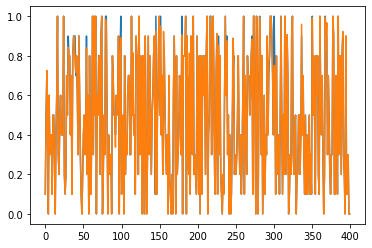

In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
# define model
model = RandomForestRegressor(max_depth=20, random_state=0)
# fit model
#training_inputs2=np.concatenate((training_inputs, val_inputs), axis=0)
#training_outputs2=np.concatenate((training_outputs, val_outputs), axis=0)
training_inputs2=training_inputs
training_outputs2=training_outputs
model.fit(training_inputs2, training_outputs2)
# make a prediction
ytrainpredict = model.predict(training_inputs2)
mse = mean_squared_error(training_outputs2, ytrainpredict)
print(mse)

# make a prediction
ypredict = model.predict(test_inputs)
# summarize prediction
#print(yhat[0])
mse = mean_squared_error(test_outputs, ypredict)
print(mse)

from sklearn.metrics import mean_squared_error
from keras import backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

predicted_y_test = model.predict(test_inputs)
mse_test = mean_squared_error(test_outputs, predicted_y_test); 
MSE = mean_squared_error(test_outputs, predicted_y_test, squared=True)
RMSE = mean_squared_error(test_outputs, predicted_y_test, squared=False)
R2 = r2_score(test_outputs, predicted_y_test)

print('RMSE = %.6f' % RMSE)
print('MSE  = %.6f' % MSE)
print('R2   = %.6f' % R2)

aux= test_outputs.shape[0]
aux2=range(aux)
aux3=range(400)

import matplotlib.pyplot as plt
plt.plot(aux3,test_outputs[0:400,0],aux3,ypredict[0:400,0])
plt.show()

## Generate the RNA model
---

#Dividing the dataset into training, validation, and test 

In [11]:
from sklearn.model_selection import train_test_split

training_inputs,test_inputs,training_outputs,test_outputs,training_outputsClasseTotal,test_outputsClasseTotal = train_test_split(inputsTotal,outputsTotal,outputsClasseTotal, test_size=0.2,  shuffle=True, random_state=42)
training_inputs,val_inputs,training_outputs,val_outputs,training_outputsClasseTotal,val_outputsClasseTotal    = train_test_split(inputsTotal,outputsTotal,outputsClasseTotal, test_size=0.2,  shuffle=True, random_state=42)

print(training_inputs.shape)
print(val_inputs.shape)
print(test_inputs.shape)


(14078, 4)
(3520, 4)
(3520, 4)


### Define Parameters and Hyperparameters for the RNA

In [12]:
from datetime import datetime

now = datetime.now() 
model_filename = path+"model_"+now.strftime("%Y%m%d%H%M%S")+'.hdf5'
print(model_filename)

# RNA
n_features = inputsTotal.shape[1]
n_output1 =outputsTotal.shape[1]
n_output2 =outputsClasseTotal.shape[1]

drive/MyDrive/Colab_Notebooks/RNA_Sensor_Luz/model_20221104083342.hdf5


RNA Model

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 100)          500         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 200)          20200       ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 120)          24120       ['dense_1[0][0]']                
                                                                                              

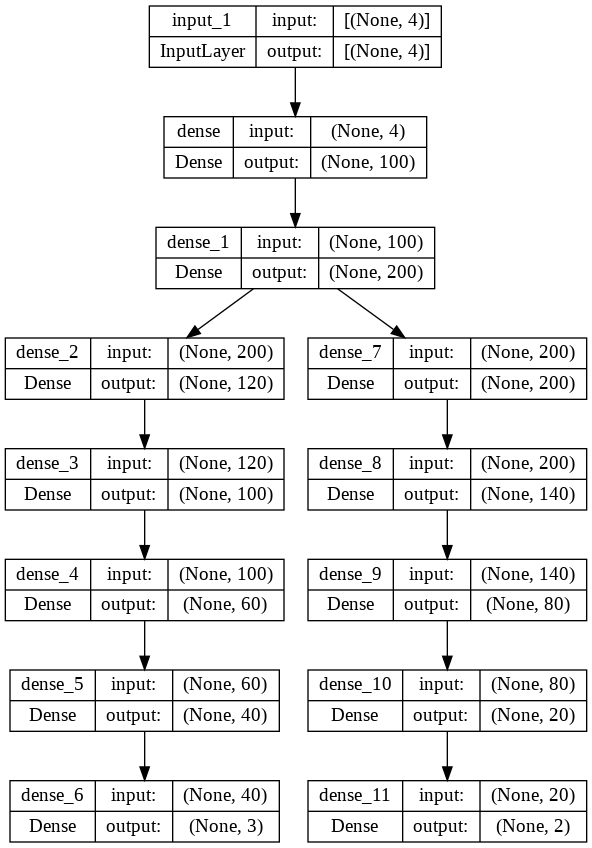

In [13]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import models
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras.layers import *
from keras.optimizers import *
from keras.models import Model
import tensorflow as tf

input_a=Input(n_features)
a=Dense(100, activation='tanh')(input_a)
output_a=Dense(200, activation='tanh')(a)

b=Dense(120, activation='tanh')(output_a)
b=Dense(100, activation='tanh')(b)
b=Dense(60, activation='tanh')(b)
b=Dense(40, activation='tanh')(b)
#b = keras.layers.Dropout(0.05)(b)
output_b=Dense(n_output1, activation='tanh')(b)

c=Dense(200, activation='tanh')(output_a)
c=Dense(140, activation='tanh')(c)
c=Dense(80, activation='tanh')(c)
c=Dense(20, activation='tanh')(c)
#c = keras.layers.Dropout(0.05)(c)
output_c=Dense(n_output2, activation='softmax')(c)

model = Model(inputs=[input_a],outputs=[output_b,output_c])

optimizer=keras.optimizers.Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name="Adam")
model.compile(loss=["mse", "binary_crossentropy"], loss_weights=[0.6, 0.4], optimizer='adam',metrics=["mse", "acc"])


model.summary()
plot_model(model, to_file = 'model_plot.png', show_shapes=True, show_layer_names=True)


### Training the model

In [14]:
# fit model
#escolhendo melhor epoch
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='loss', 
                                             patience=8, 
                                             verbose=1, 
                                             factor=0.8, 
                                             min_lr=0.0001)

bst_model_path = model_filename

model_checkpoint = ModelCheckpoint(bst_model_path, monitor='loss', verbose=1, save_best_only=True, mode='auto', period=1)


history = model.fit(training_inputs, [training_outputs,training_outputsClasseTotal], batch_size=16, epochs = 200, validation_data=(val_inputs,[val_outputs,val_outputsClasseTotal]),shuffle=True, callbacks=[model_checkpoint,learning_rate_reduction])
#history = model.fit(training_inputs, [training_outputs,training_outputsClasseTotal], batch_size=16, epochs = 150, validation_data=(val_inputs,[val_outputs,val_outputsClasseTotal]),shuffle=True, callbacks=[model_checkpoint])

#model.load_weights(bst_model_path)

#salvando dados de treinamento e validação
np.savetxt(path+'loss.csv', np.array(history.history['loss']), delimiter=",")
np.savetxt(path+'val_loss.csv', np.array(history.history['val_loss']), delimiter=",")

Epoch 1/200
879/880 [============================>.] - ETA: 0s - loss: 0.3335 - dense_6_loss: 0.1361 - dense_11_loss: 0.6297 - dense_6_mse: 0.1361 - dense_6_acc: 0.7866 - dense_11_mse: 0.2296 - dense_11_acc: 0.6507
Epoch 1: loss improved from inf to 0.33362, saving model to drive/MyDrive/Colab_Notebooks/RNA_Sensor_Luz/model_20221104083342.hdf5
880/880 [==============================] - 12s 10ms/step - loss: 0.3336 - dense_6_loss: 0.1361 - dense_11_loss: 0.6299 - dense_6_mse: 0.1361 - dense_6_acc: 0.7867 - dense_11_mse: 0.2298 - dense_11_acc: 0.6506 - val_loss: 0.3020 - val_dense_6_loss: 0.1257 - val_dense_11_loss: 0.5663 - val_dense_6_mse: 0.1257 - val_dense_6_acc: 0.7710 - val_dense_11_mse: 0.1963 - val_dense_11_acc: 0.6997 - lr: 0.0010
Epoch 2/200
871/880 [============================>.] - ETA: 0s - loss: 0.3062 - dense_6_loss: 0.1318 - dense_11_loss: 0.5679 - dense_6_mse: 0.1318 - dense_6_acc: 0.7914 - dense_11_mse: 0.2033 - dense_11_acc: 0.7014
Epoch 2: loss improved from 0.33362 t

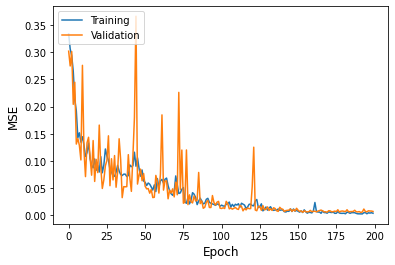

<Figure size 432x288 with 0 Axes>

In [15]:
import numpy as np
import matplotlib.pyplot as plt

fontsize = 12

#ploting trainig and validation curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE', fontsize=fontsize)
plt.xlabel('Epoch', fontsize=fontsize)
plt.legend(['Training', 'Validation'], loc='upper left')
#plt.axis([-1, 100, 0, 0.035])
plt.show()
plt.savefig(path+'convergencia.eps', format='eps')
plt.savefig(path+'convergencia.png', format='png')


##Testing The Model
---

In [ ]:
#loading the best model
#model.load_weights(bst_model_path)

110/110 [==============================] - 0s 3ms/step
RMSE = 0.067943
MSE  = 0.004687
R2   = 0.988263
accuracy   = 0.998011


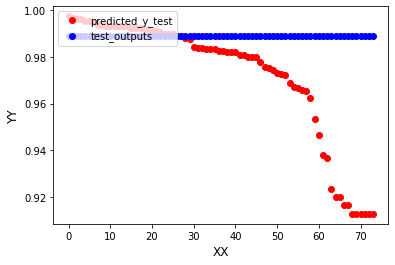

In [17]:
from sklearn.metrics import mean_squared_error
from keras import backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

[predicted_y_test,predicted_y_test_classe] = model.predict(test_inputs)

#print(test_outputs.shape)
#print(test_inputs.shape)
#print(predicted_y_test.shape)

mse_test = mean_squared_error(test_outputs, predicted_y_test); 
MSE = mean_squared_error(test_outputs, predicted_y_test, squared=True)
RMSE = mean_squared_error(test_outputs, predicted_y_test, squared=False)
R2 = r2_score(test_outputs, predicted_y_test)

print('RMSE = %.6f' % RMSE)
print('MSE  = %.6f' % MSE)
print('R2   = %.6f' % R2)

#print(predicted_y_test_classe.shape)
#rint(predicted_y_test_classe)
#print(test_outputsClasseTotal.shape)
#print(test_outputsClasseTotal)

#print(predicted_y_test_classe)
#predicted_y_test_classe_aux=[]
for i in range(len(predicted_y_test_classe)):
    if predicted_y_test_classe[i,0]>=0.5:
       predicted_y_test_classe[i,0]=1
    else:
       predicted_y_test_classe[i,0]=0
    if predicted_y_test_classe[i,1]>=0.5:
       predicted_y_test_classe[i,1]=1
    else:
       predicted_y_test_classe[i,1]=0    

#print(predicted_y_test_classe)

from sklearn.metrics import accuracy_score
scores = accuracy_score(test_outputsClasseTotal, predicted_y_test_classe)
print('accuracy   = %.6f' % scores)



predicted1 = test_inputs[:,0:1]
test_outputs1 = predicted_y_test[:,0:1]
predicted2 = test_inputs[:,1:2]
test_outputs2 = predicted_y_test[:,1:2]
predicted3 = test_inputs[:,2:3]
test_outputs3 = predicted_y_test[:,2:3]

predicted1 = sorted(predicted1, reverse=True)
test_outputs1= sorted(test_outputs1, reverse=True)
predicted2 = sorted(predicted2)
test_outputs2 = sorted(test_outputs2)
predicted3 = sorted(predicted3)
test_outputs3 = sorted(test_outputs3)

n_samples = 75;
plt.plot(predicted1[1:n_samples],'ro')
plt.plot(test_outputs1[1:n_samples],'bo')
plt.ylabel('YY', fontsize=12)
plt.xlabel('XX', fontsize=12)
plt.legend(['predicted_y_test', 'test_outputs'], loc='upper left')
plt.show()

np.savetxt(path+'predicted_y_test.csv', np.array(predicted_y_test), delimiter=",")
np.savetxt(path+'y_test.csv', np.array(test_outputs), delimiter=",")


# gera a matriz de confusão do teste


In [18]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão normalizada")
    else:
        print('Matriz de confusão sem normalização')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Rótulo verdadeiro')
    plt.xlabel('Rótulo previsto')

110/110 [==============================] - 0s 2ms/step
[[1748    0]
 [   7 1765]]
1748
0
7
1765


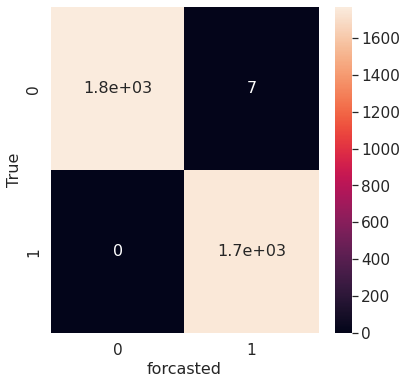

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

[predicted_y_test,predicted_y_test_classe]= model.predict(test_inputs)

predicted_y_test_classe = np.around(predicted_y_test_classe)
test_outputsClasseTotalaux=test_outputsClasseTotal.to_numpy()

#Labels estão binarizados, mas a matriz de confusão não aceita. 
#Faz a "desbinarização" dos labels
Y_test_non_category = [ np.argmax(t) for t in test_outputsClasseTotalaux ]
y_test_pred_non_category = [ np.argmax(t) for t in predicted_y_test_classe ]
#print(Y_test_non_category)
#print(y_test_pred_non_category)

cm = confusion_matrix(Y_test_non_category, y_test_pred_non_category)
print(cm)


tn, fp, fn, tp = cm.ravel()
cm = np.array([[tp, fn],[fp,tn]])

print(tn)
print(fp)
print(fn)
print(tp)

plt.figure(figsize=(6,6))
sns.set(font_scale=1.4) # for label size
df_cm = pd.DataFrame(cm, range(2), range(2))
aux=sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.xlabel('forcasted',fontsize=16)
plt.ylabel('True',fontsize=16)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.show()

figure = aux.get_figure()    
figure.savefig(path+'Matriz.eps', dpi=400)
figure.savefig(path+'Matriz.png', dpi=400)




In [ ]:
# Analizar a rede AW68 em AW460
#dataset3 = np.genfromtxt(path+"dadosAW460tr.csv", delimiter=',')
#dataset3 = dataset3.astype(float)
#scaler = MinMaxScaler()
#scaled_dataset3 = scaler.fit_transform(dataset3)
#inputs3 = scaled_dataset3[:,3:7]
#outputs3 =scaled_dataset3[:,0:2]
#predicted_y_test_AW460 = model.predict(inputs3)
#def root_mean_squared_error(outputs3, predicted_y_test_AW460):
#        return K.sqrt(K.mean(K.square(predicted_y_test_AW460 - outputs3)))
#rmse_test = root_mean_squared_error(outputs3, predicted_y_test_AW460); 
#print("rmse_test:", rmse_test)

#mse_test = mean_squared_error(outputs3, predicted_y_test_AW460); 
#print("mse_test:", mse_test)

In [ ]:
# inverter normalizacao
#aux=[test_inputs,predicted_y_test]
aux=np.concatenate((predicted_y_test,test_inputs), axis=1)
aux1=np.concatenate((test_outputs,test_inputs), axis=1)
#print(predicted_y_test)
#print(test_inputs)
#print(aux)
aux= scaler.inverse_transform(aux)
aux1= scaler.inverse_transform(aux1)
print(aux)
print(aux1)

NameError: ignored

Ordenar Matriz

[[19.23069163]
 [18.84164727]
 [ 9.27948277]
 ...
 [17.79096663]
 [15.66640802]
 [14.91185885]]
[[ 1.5025577 ]
 [ 1.89764619]
 [11.46572686]
 ...
 [ 2.9544841 ]
 [ 5.075607  ]
 [ 5.82804197]]


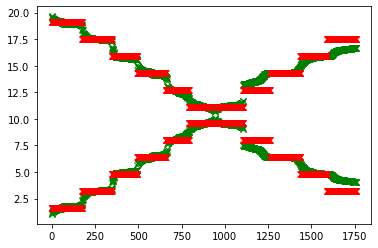

In [ ]:
#predicted1 = predicted_y_test[:,0:1]
#test_outputs1 = test_outputs[:,0:1]
#predicted2 = predicted_y_test[:,1:2]
#test_outputs2 = test_outputs[:,1:2]

predicted1 = aux[:,0:1]
test_outputs1 = aux1[:,0:1]
predicted2 = aux[:,1:2]
test_outputs2 = aux1[:,1:2]

print(predicted1)
print(predicted2)
predicted1 = sorted(predicted1, reverse=True)
test_outputs1= sorted(test_outputs1, reverse=True)
predicted2 = sorted(predicted2)
test_outputs2 = sorted(test_outputs2)
#print(numeros_ordenados)
plt.plot(predicted1, 'gx')
plt.plot(test_outputs1, 'rx')
plt.plot(predicted2, 'gx')
plt.plot(test_outputs2, 'rx')

#salvando dados de treinamento e validação
np.savetxt(path+'AguaPred.csv', predicted1, delimiter=",")
np.savetxt(path+'AguaReal.csv', test_outputs1, delimiter=",")
np.savetxt(path+'OleoPred.csv', predicted2, delimiter=",")
np.savetxt(path+'OleoReal.csv', test_outputs2, delimiter=",")

Coefficients: 
 [[0.97466805]]
Mean squared error: 0.28
Coefficient of determination: 0.99


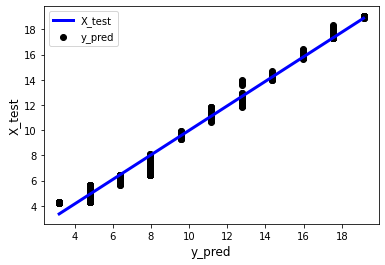

<Figure size 432x288 with 0 Axes>

In [ ]:
#plt.plot(numeros_ordenados2,numeros_ordenados1,'rx')

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

X_train=test_outputs1
y_train=predicted1
X_test=test_outputs1
y_test=predicted1

#print(test_outputs1)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))



#Resultaos experimentais do AW68
x =[1,     2,     3,     4,     5,     6,     7,     8,     9,    10,    11]
aux =[2.3984,    2.4276,    2.4514,    2.4833,    2.5062,    2.5108,    2.5477,    2.6345,    2.5719,    2.6745,    2.6573]
ans =[2.3973,    2.4244,    2.4516,    2.4787,    2.5059,    2.5331,    2.5602,    2.5874,    2.6145,    2.6417,    2.6689]
#scaler = MinMaxScaler()
#scaled_x = scaler.fit_transform(x)
#scaled_aux  = scaler.fit_transform(aux)
#scaled_ans  = scaler.fit_transform(ans)

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.ylabel('X_test', fontsize=12)
plt.xlabel('y_pred', fontsize=12)
plt.legend(['X_test', 'y_pred'], loc='upper left')
#plt.axis([-1, 100, 0, 0.035])
plt.show()
plt.savefig('regressao.eps', format='eps')

np.savetxt(path+'XX_test.csv', X_test, delimiter=",")
np.savetxt(path+'YY_pred.csv', y_pred, delimiter=",")

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_3 (Dense)             (None, 100)               500       
                                                                 
 dense_4 (Dense)             (None, 80)                8080      
                                                                 
 dense_5 (Dense)             (None, 40)                3240      
                                                                 
 dense_6 (Dense)             (None, 20)                820       
                                                                 
 dense_7 (Dense)             (None, 2)                 42        
                                                                 
Total params: 12,682
Trainable params: 12,682
Non-trainable

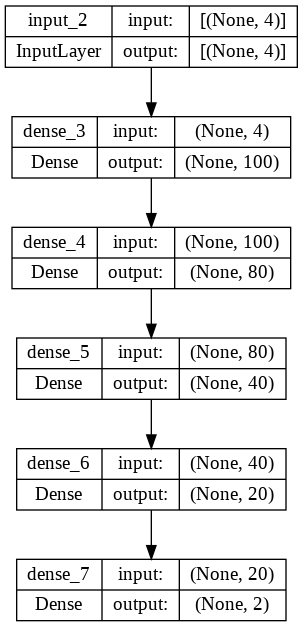

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import models
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras.layers import *
from keras.optimizers import *
from keras.models import Model
import tensorflow as tf

#print(training_outputsClasseTotal)
#print(val_outputsClasseTotal)
#print(n_output2)

input_a=Input(n_features)
a=Dense(100, activation='sigmoid')(input_a)
a=Dense(80, activation='sigmoid')(a)
a=Dense(40, activation='sigmoid')(a)
a=Dense(20, activation='sigmoid')(a)
output_c=Dense(n_output2, activation='softmax')(a)

model = Model(input_a,output_c)

optimizer=keras.optimizers.Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name="Adam")
model.compile(loss="binary_crossentropy", optimizer='adam',metrics='acc')


model.summary()
plot_model(model, to_file = 'model_plot.png', show_shapes=True, show_layer_names=True)



In [ ]:
# fit model
#escolhendo melhor epoch
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='loss', 
                                             patience=8, 
                                             verbose=1, 
                                             factor=0.8, 
                                             min_lr=0.0001)

bst_model_path = model_filename

model_checkpoint = ModelCheckpoint(bst_model_path, monitor='loss', verbose=1, save_best_only=True, mode='auto', period=1)


history = model.fit(training_inputs, training_outputsClasseTotal, batch_size=16, epochs = 100, validation_data=(val_inputs,val_outputsClasseTotal),shuffle=True, callbacks=[model_checkpoint])

#model.load_weights(bst_model_path)

#salvando dados de treinamento e validação
np.savetxt(path+'loss.csv', np.array(history.history['loss']), delimiter=",")
np.savetxt(path+'val_loss.csv', np.array(history.history['val_loss']), delimiter=",")

Epoch 1/100
880/880 [==============================] - ETA: 0s - loss: 0.6767 - acc: 0.5493
Epoch 1: loss improved from inf to 0.67672, saving model to drive/MyDrive/Colab_Notebooks/RNA_Sensor_Luz/model_20221031092425.hdf5
880/880 [==============================] - 5s 5ms/step - loss: 0.6767 - acc: 0.5493 - val_loss: 0.6269 - val_acc: 0.6071
Epoch 2/100
869/880 [============================>.] - ETA: 0s - loss: 0.6268 - acc: 0.6085
Epoch 2: loss improved from 0.67672 to 0.62651, saving model to drive/MyDrive/Colab_Notebooks/RNA_Sensor_Luz/model_20221031092425.hdf5
880/880 [==============================] - 3s 4ms/step - loss: 0.6265 - acc: 0.6083 - val_loss: 0.6044 - val_acc: 0.5966
Epoch 3/100
880/880 [==============================] - ETA: 0s - loss: 0.6133 - acc: 0.6067
Epoch 3: loss improved from 0.62651 to 0.61330, saving model to drive/MyDrive/Colab_Notebooks/RNA_Sensor_Luz/model_20221031092425.hdf5
880/880 [==============================] - 3s 4ms/step - loss: 0.6133 - acc: 0.60

# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import accuracy_score

# define model
model = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='euclidean', metric_params=None, n_jobs=None)
# fit model
#training_inputs2=np.concatenate((training_inputs, val_inputs), axis=0)
#training_outputs2=np.concatenate((training_outputs, val_outputs), axis=0)
training_inputs2=training_inputs
training_outputs2=training_outputsClasseTotal
model.fit(training_inputs2, training_outputs2)
# make a prediction
ytrainpredict = model.predict(training_inputs2)
mse = mean_squared_error(training_outputs2, ytrainpredict)
print(mse)

scores = accuracy_score(training_outputs2, ytrainpredict)
print('Acurácia Treinamento')
print(scores)

y_test_pred = model.predict(test_inputs)
scores = accuracy_score(test_outputsClasseTotal, y_test_pred)
print('Acurácia Teste')
print(scores)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.00035516408580764315
Acurácia Treinamento
0.9996448359141924
Acurácia Teste
0.9994318181818181
